In [274]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [275]:
features_df  = pd.read_csv('w_features.csv')
stores_df  = pd.read_csv('w_stores.csv')
train_df  = pd.read_csv('w_train.csv')
test_df  = pd.read_csv('w_test.csv')

In [276]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [277]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [278]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [279]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [280]:
# merge data
merged_train_df = train_df.merge(stores_df, how='left').merge(features_df, how='left')
merged_test_df = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [281]:
merged_train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [282]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [283]:
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


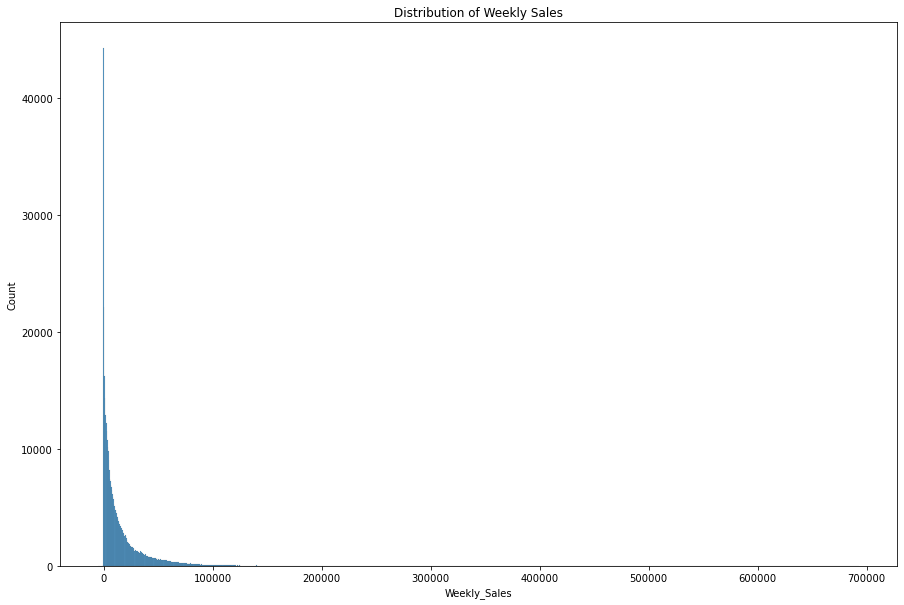

In [284]:
Weekly_sales_df = merged_train_df[['Weekly_Sales']].copy()
plt.figure(figsize=(15,10))
sns.histplot(x=Weekly_sales_df.Weekly_Sales)
plt.title("Distribution of Weekly Sales")
plt.xlabel('Weekly_Sales');

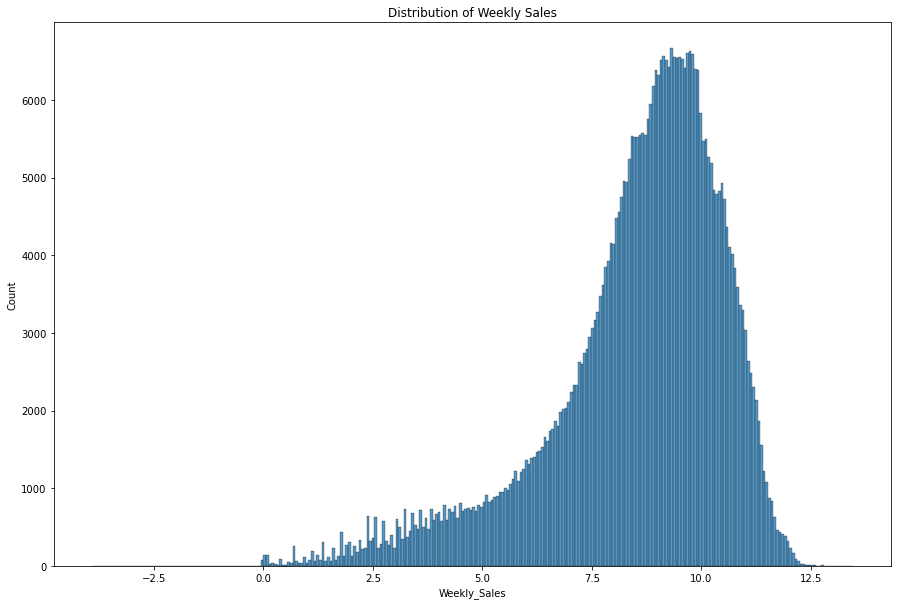

In [285]:
Weekly_sales_df = np.log1p(merged_train_df[['Weekly_Sales']].copy())
plt.figure(figsize=(15,10))
sns.histplot(x=Weekly_sales_df.Weekly_Sales)
plt.title("Distribution of Weekly Sales")
plt.xlabel('Weekly_Sales');

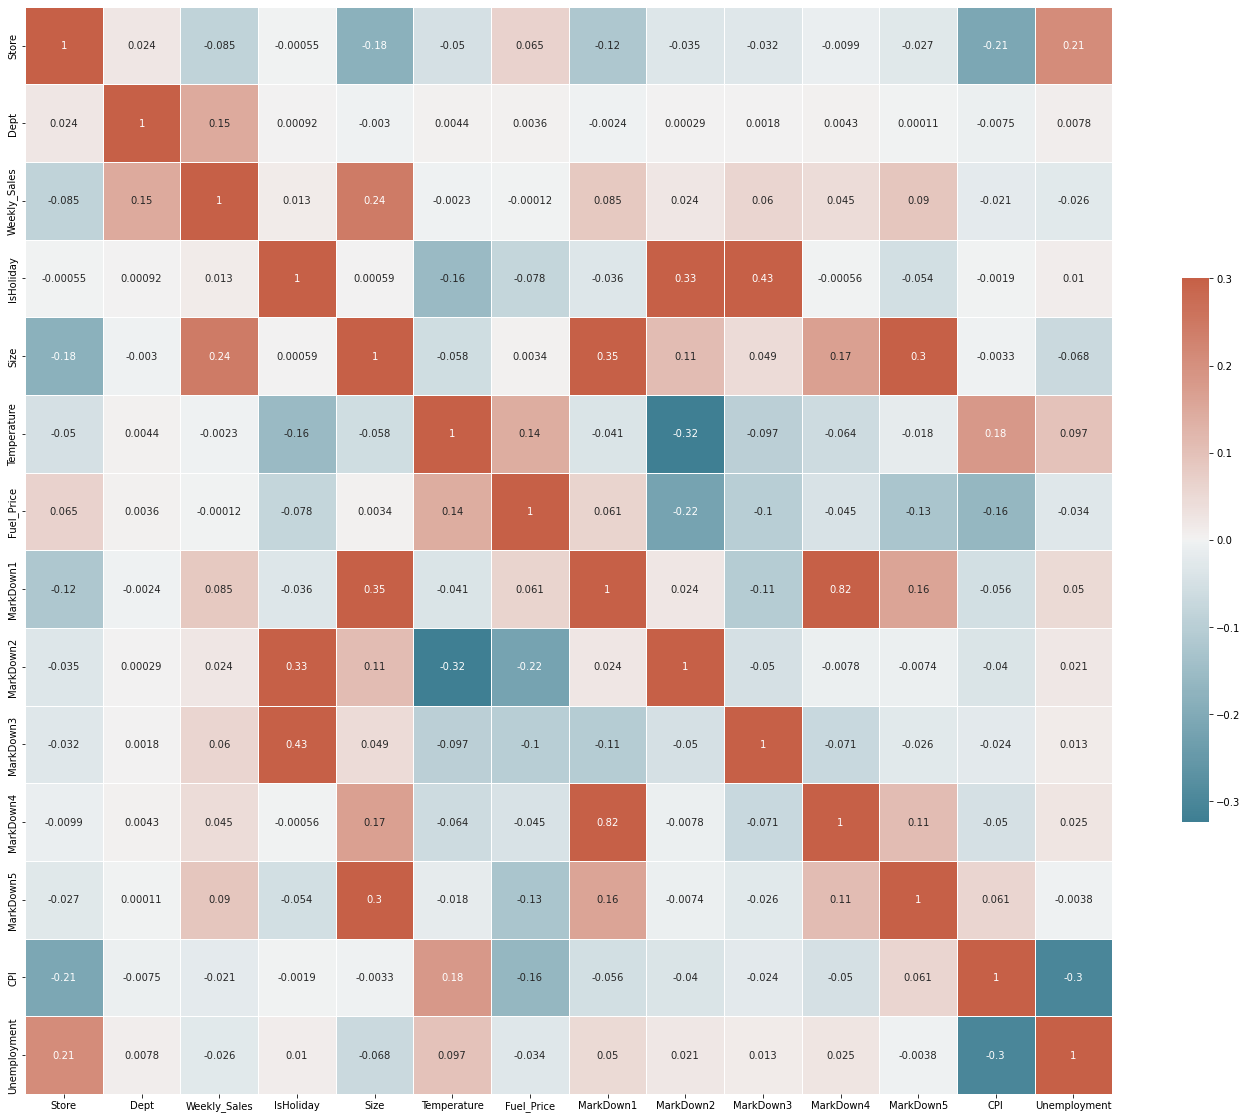

In [286]:
corr = merged_train_df.corr()
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

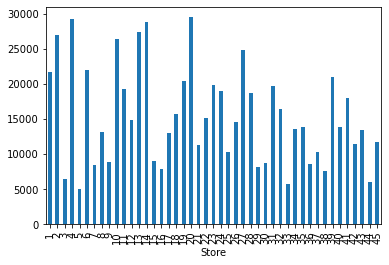

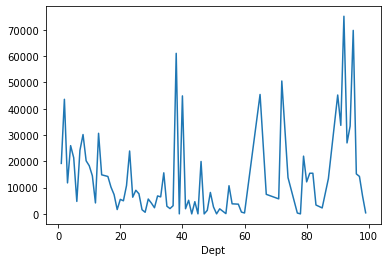

In [287]:
merged_train_df.groupby(['Store'])['Weekly_Sales'].mean().plot.bar()
plt.show()
merged_train_df.groupby(['Dept'])['Weekly_Sales'].mean().plot()
plt.show()

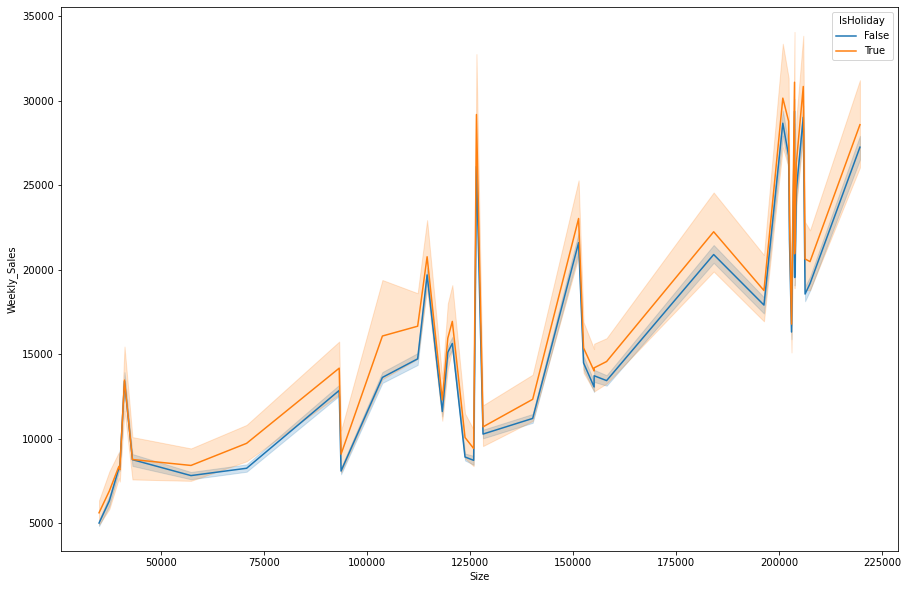

In [288]:
plt.figure(figsize=(15,10))
sns.lineplot (data = merged_train_df, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

In [289]:
# Splitting Date Column
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [290]:
split_date(merged_train_df)
split_date(merged_test_df)

In [291]:
d = merged_test_df['Date']

In [292]:
merged_train_df = merged_train_df.drop(['Date'], axis=1)
merged_test_df = merged_test_df.drop(['Date'], axis=1)

In [293]:
merged_train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6
2,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7
3,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8
4,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9


In [294]:
train_copy = merged_train_df.copy()
categorical_cols = train_copy.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Type']

In [295]:
# convert to int
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_copy[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_copy[encoded_cols] = encoder.transform(train_copy[categorical_cols])

In [296]:
Test_copy = merged_test_df.copy()
categorical_cols1 = Test_copy.select_dtypes(include=['object']).columns.tolist()
encoded_cols1 = list(encoder.get_feature_names_out(categorical_cols1))
Test_copy[encoded_cols1] = encoder.transform(Test_copy[categorical_cols1])

In [297]:
encoder = LabelEncoder()
encoder.fit(train_copy['IsHoliday'])
train_copy['IsHoliday'] = encoder.transform(train_copy['IsHoliday'])
Test_copy['IsHoliday'] = encoder.transform(Test_copy['IsHoliday'])

In [298]:
targets_df = merged_train_df['Weekly_Sales']
train_copy.drop(['Weekly_Sales', 'Type'], axis=1, inplace = True)
Test_copy.drop(['Type'], axis=1, inplace = True)

In [299]:
train_copy.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear,Type_A,Type_B,Type_C
0,1,1,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5,1.0,0.0,0.0
1,1,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6,1.0,0.0,0.0
2,1,1,0,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7,1.0,0.0,0.0
3,1,1,0,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8,1.0,0.0,0.0
4,1,1,0,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9,1.0,0.0,0.0


In [300]:
train_copy.isna().sum()/len(train_copy)*100

Store            0.000000
Dept             0.000000
IsHoliday        0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Year             0.000000
Month            0.000000
Day              0.000000
WeekOfYear       0.000000
Type_A           0.000000
Type_B           0.000000
Type_C           0.000000
dtype: float64

In [301]:
Test_copy.isna().sum()/len(Test_copy)*100

Store            0.000000
Dept             0.000000
IsHoliday        0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
Year             0.000000
Month            0.000000
Day              0.000000
WeekOfYear       0.000000
Type_A           0.000000
Type_B           0.000000
Type_C           0.000000
dtype: float64

In [302]:
numeric_cols = train_copy.columns[0:17].tolist()
numeric_cols1 = train_copy.columns[0:17].tolist()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(train_copy[numeric_cols])
train_copy[numeric_cols] = imputer.transform(train_copy[numeric_cols])
Test_copy[numeric_cols1] = imputer.transform(Test_copy[numeric_cols])

In [303]:
train_copy.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear,Type_A,Type_B,Type_C
0,1.0,1.0,0.0,151315.0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010.0,2.0,5.0,5.0,1.0,0.0,0.0
1,1.0,1.0,1.0,151315.0,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010.0,2.0,12.0,6.0,1.0,0.0,0.0
2,1.0,1.0,0.0,151315.0,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010.0,2.0,19.0,7.0,1.0,0.0,0.0
3,1.0,1.0,0.0,151315.0,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010.0,2.0,26.0,8.0,1.0,0.0,0.0
4,1.0,1.0,0.0,151315.0,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010.0,3.0,5.0,9.0,1.0,0.0,0.0


In [304]:
Test_copy.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear,Type_A,Type_B,Type_C
0,1.0,1.0,0.0,151315.0,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573,2012.0,11.0,2.0,44.0,1.0,0.0,0.0
1,1.0,1.0,0.0,151315.0,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573,2012.0,11.0,9.0,45.0,1.0,0.0,0.0
2,1.0,1.0,0.0,151315.0,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573,2012.0,11.0,16.0,46.0,1.0,0.0,0.0
3,1.0,1.0,1.0,151315.0,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573,2012.0,11.0,23.0,47.0,1.0,0.0,0.0
4,1.0,1.0,0.0,151315.0,52.34,3.207,2460.03,3334.628621,3838.35,150.57,6966.34,223.610984,6.573,2012.0,11.0,30.0,48.0,1.0,0.0,0.0


In [305]:
targets_df.head()

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

In [306]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_copy, targets_df, test_size=0.25, random_state=42)

In [307]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(x_train, y_train)
train_preds = model.predict(x_train)
train_rmse = mean_squared_error(y_train, train_preds, squared = False)
val_preds = model.predict(x_val)
val_rmse = mean_squared_error(y_val, val_preds, squared = False)
print('Training RMSE:', train_rmse)
print('Validation RMSE:', val_rmse)

Training RMSE: 21613.932352556112
Validation RMSE: 21800.84081771867


In [308]:
train_score = model.score(x_train,y_train)
val_score = model.score(x_val, y_val)
print('Training Score', train_score)
print('Validation SCore', val_score)

Training Score 0.09013211561463119
Validation SCore 0.09101984864975343


In [309]:
input_cols = train_copy.columns.tolist()
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight': np.append(model.coef_, model.intercept_)}).sort_values(by='weight', axis=0, ascending=False).head(14)
weights_df

,feature,weight
20,1,1.219743e+06
19,Type_C,4.002860e+03
16,WeekOfYear,1.119068e+03
5,Fuel_Price,5.660455e+02
2,IsHoliday,3.209243e+02
1,Dept,1.104160e+02
4,Temperature,6.415374e+00
8,MarkDown3,1.034966e-01
3,Size,9.627521e-02
10,MarkDown5,9.084960e-02


In [310]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
train_preds = dt.predict(x_train)
train_score = dt.score(x_train, y_train)*100
print('Decision Tree Training Score' , train_score)
val_preds = dt.predict(x_val)
val_score = dt.score(x_val, y_val)*100
print('Decision Tree Validation Score', val_score)

Decision Tree Training Score 100.0
Decision Tree Validation Score 95.52473923186409


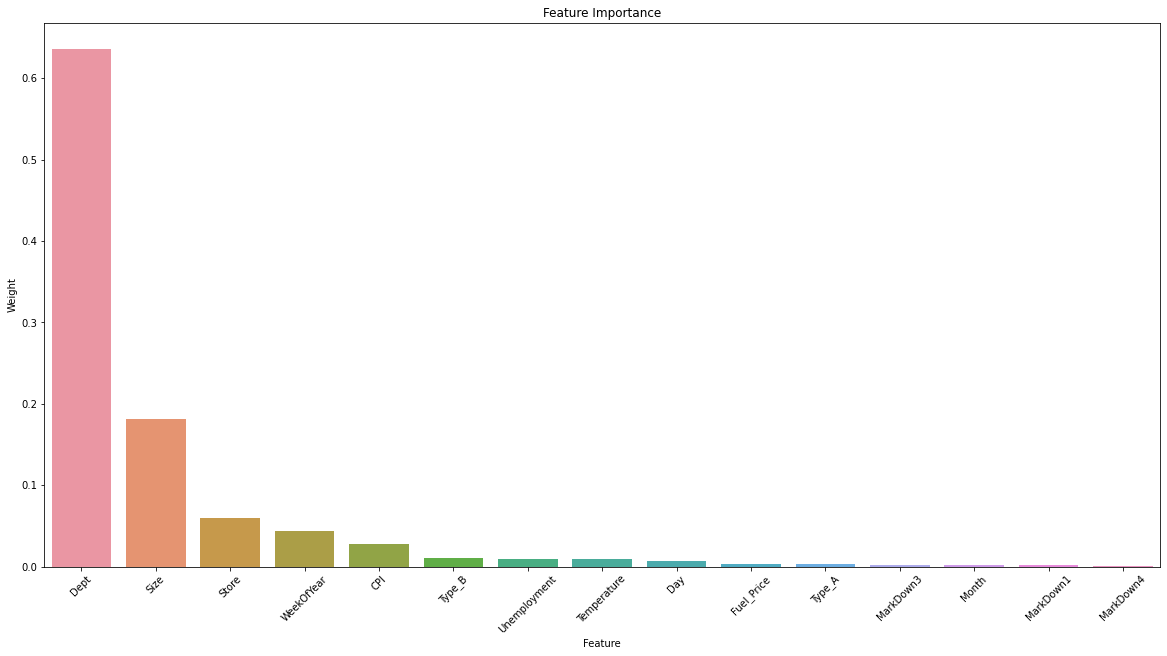

In [311]:
# Feature importance
tree_weights = dt.feature_importances_
weights_df = pd.DataFrame({
    'Feature': input_cols,
    'Weight': tree_weights
                }).sort_values('Weight', ascending=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title('Feature Importance')
sns.barplot(data=weights_df.head(15), x='Feature', y='Weight');

In [312]:
# 'MarkDown2','MarkDown5','IsHoliday','Type_C', 'Year' were very low in importance
# dropping them from training and validation dataframes
x_train = x_train.drop(['MarkDown2','MarkDown5','IsHoliday','Type_C', 'Year'], axis=1)
x_val = x_val.drop(['MarkDown2','MarkDown5','IsHoliday','Type_C', 'Year'], axis=1)

In [313]:
dt.fit(x_train, y_train)
train_preds = dt.predict(x_train)
train_score = dt.score(x_train, y_train)*100
print('Decision Tree Training Score' , train_score)
val_preds = dt.predict(x_val)
val_score = dt.score(x_val, y_val)*100
print('Decision Tree Validation Score', val_score)

Decision Tree Training Score 100.0
Decision Tree Validation Score 95.44582054440971


In [314]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(x_train,y_train)
rf_train_preds = rf.predict(x_train)
rf_train_rmse = mean_squared_error(y_train, rf_train_preds, squared = False)
rf_val_preds = rf.predict(x_val)
rf_val_rmse = mean_squared_error(y_val, rf_val_preds, squared = False)
print('Train RMSE: {}, Validation RMSE: {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE: 1296.8551166154716, Validation RMSE: 3557.8268479496264


In [315]:
train_score = rf.score(x_train, y_train)*100
print('Random Forest Training Score' , train_score)
val_score = rf.score(x_val, y_val)*100
print('Random Forest Validation Score', val_score)

Random Forest Training Score 99.67243787494371
Random Forest Validation Score 97.57909622084485


In [316]:
Test_copy = Test_copy.drop(['MarkDown2','MarkDown5','IsHoliday','Type_C', 'Year'], axis=1)

In [317]:
rf_test_preds = rf.predict(Test_copy)
rf_test_preds

array([29450.5288, 20984.9693, 19451.9963, ...,   532.423 ,   508.4385,
         490.4792])

In [323]:
result = pd.DataFrame({'Date':d,'Store':Test_copy['Store'].astype(int), 'Weekly_Sales':rf_test_preds})
result.head()

,Date,Store,Weekly_Sales
0,2012-11-02,1,29450.5288
1,2012-11-09,1,20984.9693
2,2012-11-16,1,19451.9963
3,2012-11-23,1,19880.1484
4,2012-11-30,1,31780.7401
